In [1]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open("./imagenet_class_names.txt", "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)


class_names = ["background"] + load_class_names()

In [2]:
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [3]:
import tensorflow as tf
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

In [4]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [5]:
import scipy

In [6]:
width = 299
height = 299
channels = 3
image = scipy.misc.imread("./panda.jpg")[:, :, :channels]

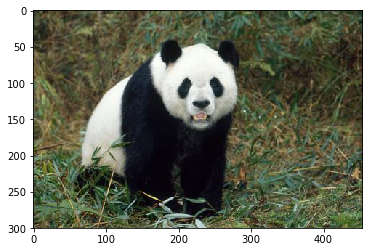

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image)
#plt.axis("off")
plt.show()

In [8]:
image

array([[[ 44,  66,  45],
        [ 48,  67,  47],
        [ 55,  70,  49],
        ..., 
        [ 21,  24,  13],
        [ 24,  27,  18],
        [ 17,  20,  11]],

       [[ 45,  64,  44],
        [ 44,  61,  42],
        [ 47,  62,  41],
        ..., 
        [ 28,  31,  20],
        [ 25,  28,  19],
        [ 15,  18,   9]],

       [[ 39,  56,  37],
        [ 41,  56,  37],
        [ 44,  57,  37],
        ..., 
        [ 39,  47,  34],
        [ 37,  45,  34],
        [ 29,  37,  26]],

       ..., 
       [[ 33,  29,   4],
        [ 90,  84,  60],
        [102,  95,  69],
        ..., 
        [118, 147,  93],
        [113, 142,  88],
        [117, 146,  92]],

       [[ 36,  30,   4],
        [ 85,  79,  53],
        [ 99,  92,  66],
        ..., 
        [117, 146,  90],
        [103, 132,  76],
        [102, 131,  75]],

       [[ 27,  21,   0],
        [ 81,  74,  48],
        [104,  94,  69],
        ..., 
        [ 88, 119,  62],
        [ 74, 105,  48],
        [ 76, 107,

In [9]:
image_resize = scipy.misc.imresize(image,(299,299,3))

In [10]:
image_resize.shape

(299, 299, 3)

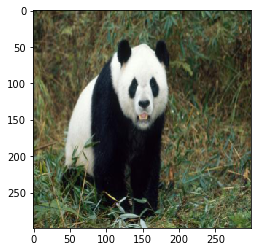

In [11]:
plt.imshow(image_resize)
#plt.axis("off")
plt.show()

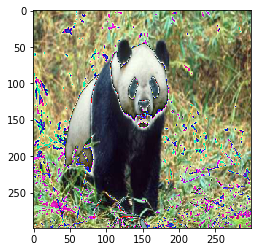

In [12]:
image_resize = 2 * (image_resize/255) - 1
plt.imshow(image_resize)
#plt.axis("off")
plt.show()

In [13]:
import numpy as np

In [14]:
np.max(image_resize)

1.0

In [15]:
np.min(image_resize)

-1.0

In [16]:
X_test = image_resize.reshape(-1, height, width, channels)

with tf.Session() as sess:
    saver.restore(sess, "./inception_v3.ckpt")
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./inception_v3.ckpt


In [17]:
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

389

In [18]:
class_names[most_likely_class_index]

'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'

In [19]:
#top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = predictions_val[0][:5]
#for i in top_5:
    #print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))
top_5

array([  3.74595074e-05,   3.66976128e-05,   2.93851754e-05,
         1.91646941e-05,   3.26022637e-05], dtype=float32)

In [20]:
predictions_val

array([[  3.74595074e-05,   3.66976128e-05,   2.93851754e-05, ...,
          1.89879720e-05,   4.02745500e-05,   7.10862660e-05]], dtype=float32)

In [21]:
predictions_val.shape

(1, 1001)

In [22]:
top_5 = np.argsort(predictions_val[0])

In [23]:
top_5

array([883, 373, 161, ..., 903, 388, 389], dtype=int64)

In [24]:
for i in top_5[-5:]:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

space shuttle: 0.09%
soccer ball: 0.11%
whistle: 0.19%
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens: 0.21%
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca: 94.47%


In [25]:
logits

<tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>

In [26]:
logits.graph

In [27]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [28]:
logits.op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0' shape=(?, 1, 1, 1001) dtype=float32>

In [29]:
logits.op.inputs[0].op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/Identity:0' shape=(?, 1, 1, 2048) dtype=float32>

# preprocess picture

In [30]:
import os

In [31]:
MONKEY_PATH = os.path.join(".","monkey")

In [32]:
MONKEY_PATH

'.\\monkey'

In [33]:
monkey_root_path = os.path.join(MONKEY_PATH,"training")

In [34]:
monkey_classes = [name for name in os.listdir(monkey_root_path)]
monkey_classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [35]:
from collections import defaultdict

image_paths = defaultdict(list)   #make is as a dictionary

for monkey_class in monkey_classes:
    image_dir = os.path.join(monkey_root_path, monkey_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[monkey_class].append(os.path.join(image_dir,filepath))
        if filepath.endswith(".png"):
            image_paths[monkey_class].append(os.path.join(image_dir,filepath))

In [36]:
image_paths

defaultdict(list,
            {'n0': ['.\\monkey\\training\\n0\\n0018.jpg',
              '.\\monkey\\training\\n0\\n0019.jpg',
              '.\\monkey\\training\\n0\\n0020.jpg',
              '.\\monkey\\training\\n0\\n0021.jpg',
              '.\\monkey\\training\\n0\\n0022.jpg',
              '.\\monkey\\training\\n0\\n0023.jpg',
              '.\\monkey\\training\\n0\\n0024.jpg',
              '.\\monkey\\training\\n0\\n0025.jpg',
              '.\\monkey\\training\\n0\\n0026.jpg',
              '.\\monkey\\training\\n0\\n0027.jpg',
              '.\\monkey\\training\\n0\\n0028.jpg',
              '.\\monkey\\training\\n0\\n0029.jpg',
              '.\\monkey\\training\\n0\\n0030.jpg',
              '.\\monkey\\training\\n0\\n0031.jpg',
              '.\\monkey\\training\\n0\\n0032.jpg',
              '.\\monkey\\training\\n0\\n0033.jpg',
              '.\\monkey\\training\\n0\\n0034.jpg',
              '.\\monkey\\training\\n0\\n0035.jpg',
              '.\\monkey\\training\\n0\\

class: n0


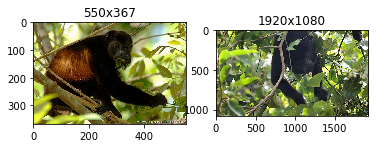

class: n1


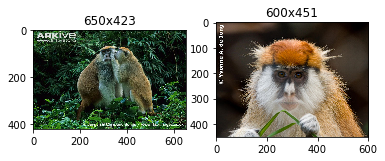

class: n2


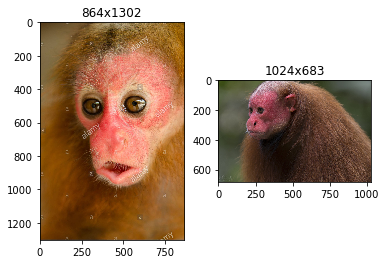

class: n3


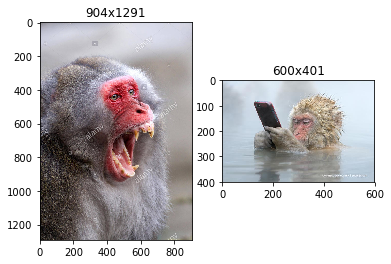

class: n4


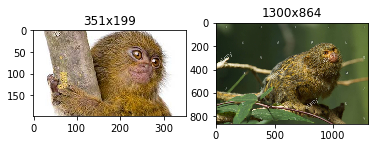

class: n5


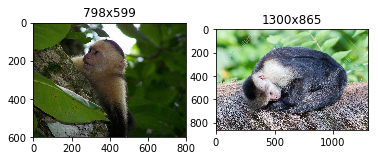

class: n6


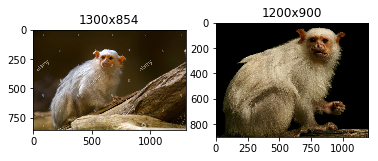

class: n7


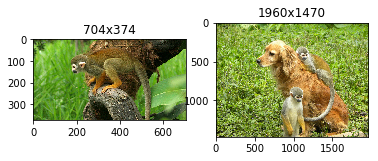

class: n8


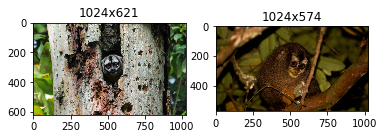

class: n9


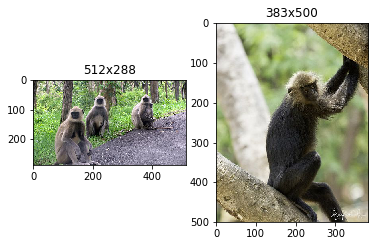

In [37]:
example_num = 2
for monkey_class in monkey_classes:
    print("class:", monkey_class)
    
    for index, example_path in enumerate(image_paths[monkey_class][:example_num]):
        example = scipy.misc.imread(example_path)
        plt.subplot(100 + example_num * 10 + index + 1)
        plt.title("{}x{}".format(example.shape[1],example.shape[0]))
        plt.imshow(example)
    plt.show()

In [47]:
np.random.rand?

In [51]:
def augmentation(image, target_width=299, target_height=299, maxzoom = 0.2):
    height = image.shape[0]
    width = image.shape[1]
    ratio = height / width
    target_ratio = target_height / target_width
    if ratio < target_ratio:
        crop_width = width
        crop_height = int(height/target_ratio)
    else:
        crop_width = int(width * target_ratio)
        crop_height = height
    ### zoom in the picture from 1x to (1 + maxzon)x
    zoom_in_size = np.random.rand() * maxzoom + 1.0 
    crop_width = int(crop_width/zoom_in_size)
    crop_height = int(crop_height/zoom_in_size)
    
    ### randomly select the top-left point from 0 to width - crop_width
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    #print(x0,y0)
    image = image[y0:y1, x0:x1]
    
    ### 50% to flip flip right to left flip left to right
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
    
    image = scipy.misc.imresize(image,(target_height,target_width))
    
    image = (image/255 * 2) - 1
    
    return image

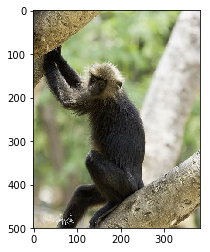

In [39]:
fliped = np.fliplr(example)
plt.imshow(fliped)
plt.show()

0 1


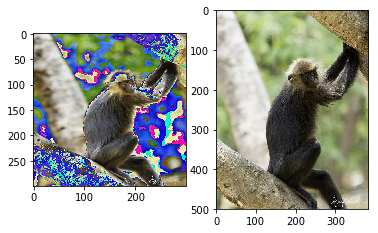

In [40]:
prepared = augmentation(example)

for i in range(2):
    if i==0:
        plt.subplot(100 + 2 * 10 + i + 1)
        plt.imshow(prepared)
    if i==1:
        plt.subplot(100 + 2 * 10 + i + 1)
        plt.imshow(example)
plt.show()

# create the real trainable dataset

In [56]:
#augmented training dataset
explore_size = 5
image_paths_monkey = defaultdict(list)


preprocessed_path = os.path.join(MONKEY_PATH,"preprocessed")
if os.path.exists(preprocessed_path) != True:
    os.mkdir(preprocessed_path)
for name in os.listdir(monkey_root_path):
    names_path = os.path.join(preprocessed_path,name)
    if os.path.exists(names_path) != True:
        os.mkdir(names_path)
    monkey_root_path_name = os.path.join(monkey_root_path, name)    
    for pic in os.listdir(monkey_root_path_name):
        if pic.endswith(".jpg"):
            image = scipy.misc.imread(os.path.join(monkey_root_path_name,pic))
            pic_list = pic.split(".")            
            for i in range(explore_size):
                pic = pic_list[0] + "_" + str(i) + "." + pic_list[1]
                image = augmentation(image)
                scipy.misc.imsave(os.path.join(names_path,pic), image)
                image_paths_monkey[name].append(os.path.join(names_path,pic))
        if pic.endswith(".png"):
            image = scipy.misc.imread(os.path.join(monkey_root_path_name,pic))
            pic_list = pic.split(".")            
            for i in range(explore_size):
                pic = pic_list[0] + "_" + str(i) + "." + pic_list[1]
                image = augmentation(image)
                scipy.misc.imsave(os.path.join(names_path,pic), image)
                image_paths_monkey[name].append(os.path.join(names_path,pic))

    

# test dataset

In [59]:
def preprocess_validationset(image, target_width=299, target_height=299):
    
    image = scipy.misc.imresize(image,(target_height,target_width))
    
    image = (image/255 * 2) - 1
    
    return image

In [60]:
image_paths_monkey_test = defaultdict(list)
monkey_root_validation_path = os.path.join(MONKEY_PATH,"validation")
test_path = os.path.join(MONKEY_PATH,"test")
if os.path.exists(test_path) != True:
    os.mkdir(test_path)
for name_test in os.listdir(monkey_root_validation_path):
    names_test_path = os.path.join(test_path,name_test)
    if os.path.exists(names_test_path) != True:
        os.mkdir(names_test_path)
    monkey_root_test_path_name = os.path.join(monkey_root_validation_path, name_test)    
    for pic_test in os.listdir(monkey_root_test_path_name):
        if pic_test.endswith(".jpg"):
            image_test = scipy.misc.imread(os.path.join(monkey_root_test_path_name,pic_test))
            image_test = preprocess_validationset(image_test)
            scipy.misc.imsave(os.path.join(names_test_path,pic_test), image_test)
            image_paths_monkey_test[name_test].append(os.path.join(names_test_path,pic_test))
        if pic.endswith(".png"):
            image_test = scipy.misc.imread(os.path.join(monkey_root_test_path_name,pic_test))
            image_test = preprocess_validationset(image_test)
            scipy.misc.imsave(os.path.join(names_test_path,pic_test), image_test)
            image_paths_monkey_test[name_test].append(os.path.join(names_test_path,pic_test))

In [46]:
haha = "n008.jpg"
fuck = haha.split(".")
fuck

['n008', 'jpg']

In [55]:
names_path

In [61]:
monkey_class_ids = {monkey_class: index for index, monkey_class in enumerate(monkey_classes)}
monkey_class_ids

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

In [64]:
monkey_paths_and_classes=[]
for monkey_class, paths in image_paths_monkey.items():
    for path in paths:
        monkey_paths_and_classes.append([path,monkey_class_ids[monkey_class]])

In [67]:
monkey_paths_and_classes[1000:2000]

[['.\\monkey\\preprocessed\\n1\\n1150_0.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1150_1.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1150_2.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1150_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1150_4.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1151_0.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1151_1.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1151_2.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1151_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1151_4.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1152_0.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1152_1.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1152_2.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1152_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1152_4.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1153_0.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1153_1.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1153_2.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1153_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n1\\n1153_4.jpg', 1],


In [89]:
train_ratio, validation_ratio = 0.8,0.2
train_size = int(len(monkey_paths_and_classes)*train_ratio)

In [76]:
np.random.seed(24)
shuffled = np.random.permutation(len(monkey_paths_and_classes))

In [78]:
shuffled

array([1642, 1971, 4942, ...,  343,  899, 4514])

In [86]:
trains = shuffled[:train_size]
validations = shuffled[train_size:]
train_set = []
validation_set = []
for train in trains:
    train_set.append(monkey_paths_and_classes[train])
for validation in validations:
    validation_set.append(monkey_paths_and_classes[validation])

In [87]:
train_set

[['.\\monkey\\preprocessed\\n3\\n3022_2.jpg', 3],
 ['.\\monkey\\preprocessed\\n3\\n3119_1.jpg', 3],
 ['.\\monkey\\preprocessed\\n8\\n8150_2.jpg', 8],
 ['.\\monkey\\preprocessed\\n4\\n4141_1.jpg', 4],
 ['.\\monkey\\preprocessed\\n1\\n1047_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n7\\n7138_2.jpg', 7],
 ['.\\monkey\\preprocessed\\n6\\n6021_2.jpg', 6],
 ['.\\monkey\\preprocessed\\n8\\n8136_4.jpg', 8],
 ['.\\monkey\\preprocessed\\n2\\n2027_3.jpg', 2],
 ['.\\monkey\\preprocessed\\n3\\n3128_2.jpg', 3],
 ['.\\monkey\\preprocessed\\n0\\n0127_2.jpg', 0],
 ['.\\monkey\\preprocessed\\n4\\n4052_0.jpg', 4],
 ['.\\monkey\\preprocessed\\n0\\n0037_1.jpg', 0],
 ['.\\monkey\\preprocessed\\n5\\n5039_0.jpg', 5],
 ['.\\monkey\\preprocessed\\n0\\n0153_3.jpg', 0],
 ['.\\monkey\\preprocessed\\n7\\n7133_1.jpg', 7],
 ['.\\monkey\\preprocessed\\n5\\n5114_0.jpg', 5],
 ['.\\monkey\\preprocessed\\n1\\n1068_3.jpg', 1],
 ['.\\monkey\\preprocessed\\n2\\n2152_2.jpg', 2],
 ['.\\monkey\\preprocessed\\n3\\n3057_2.jpg', 3],


In [88]:
validation_set

[['.\\monkey\\preprocessed\\n5\\n5164_0.jpg', 5],
 ['.\\monkey\\preprocessed\\n0\\n0030_4.jpg', 0],
 ['.\\monkey\\preprocessed\\n5\\n5037_3.jpg', 5],
 ['.\\monkey\\preprocessed\\n7\\n7042_0.jpg', 7],
 ['.\\monkey\\preprocessed\\n2\\n2151_2.jpg', 2],
 ['.\\monkey\\preprocessed\\n9\\n9018_3.jpg', 9],
 ['.\\monkey\\preprocessed\\n3\\n3052_3.jpg', 3],
 ['.\\monkey\\preprocessed\\n3\\n3074_4.jpg', 3],
 ['.\\monkey\\preprocessed\\n3\\n3112_0.jpg', 3],
 ['.\\monkey\\preprocessed\\n2\\n2067_1.jpg', 2],
 ['.\\monkey\\preprocessed\\n5\\n5128_0.jpg', 5],
 ['.\\monkey\\preprocessed\\n7\\n7127_2.jpg', 7],
 ['.\\monkey\\preprocessed\\n3\\n3136_1.jpg', 3],
 ['.\\monkey\\preprocessed\\n1\\n1054_2.jpg', 1],
 ['.\\monkey\\preprocessed\\n8\\n8053_3.jpg', 8],
 ['.\\monkey\\preprocessed\\n6\\n6131_4.jpg', 6],
 ['.\\monkey\\preprocessed\\n3\\n3167_3.jpg', 3],
 ['.\\monkey\\preprocessed\\n4\\n4123_4.jpg', 4],
 ['.\\monkey\\preprocessed\\n2\\n2144_0.jpg', 2],
 ['.\\monkey\\preprocessed\\n6\\n6119_3.jpg', 6],


In [98]:
lulu = preprocess_validationset(scipy.misc.imread('.\\monkey\\preprocessed\\n2\\n2144_0.jpg'))
validation_set = np.array(validation_set)
train_set = np.array(train_set)

In [135]:
def image_process(image):    
    image = scipy.misc.imread(image)    
    image = (image/255 * 2) - 1    
    return image

def prepare_batch(images, batch_size, iteration_count):
    batchs = images[batch_size*iteration_count:batch_size*(iteration_count+1)]
    y_batch = []
    #print(batchs.shape)
    for batch in batchs:
        #print(batch[1])
        y_batch.append(batch[1])
    x_batch = []
    for batch in batchs:
        #print(batch[0])
        x_batch.append(image_process(batch[0]))
    return np.array(x_batch), np.array(y_batch)

.\monkey\preprocessed\n3\n3022_2.jpg
.\monkey\preprocessed\n3\n3119_1.jpg
.\monkey\preprocessed\n8\n8150_2.jpg
.\monkey\preprocessed\n4\n4141_1.jpg
.\monkey\preprocessed\n1\n1047_3.jpg
.\monkey\preprocessed\n7\n7138_2.jpg
.\monkey\preprocessed\n6\n6021_2.jpg
.\monkey\preprocessed\n8\n8136_4.jpg
.\monkey\preprocessed\n2\n2027_3.jpg
.\monkey\preprocessed\n3\n3128_2.jpg


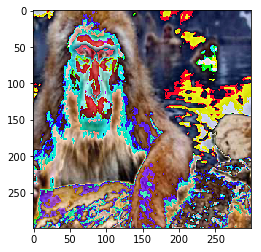

In [130]:
dudu, dada = prepare_batch(train_set, batch_size=10,iteration_count=0)
plt.imshow(dudu[0])
plt.show()

In [131]:
dada

array(['3', '3', '8', '4', '1', '7', '6', '8', '2', '3'],
      dtype='<U1')

In [133]:
dudu.dtype

dtype('float64')

In [136]:
x_val, y_val = prepare_batch(validation_set, batch_size=len(validation_set),iteration_count=0)

In [138]:
x_val.shape

(1097, 299, 299, 3)

In [139]:
n_outputs = len(monkey_classes)
n_outputs

10

In [144]:
from tensorflow.contrib.layers.python.layers import layers

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

prelogits = end_points['PreLogits']
y = tf.placeholder(tf.int32, shape=[None])
prelogits_outputs = tf.placeholder(tf.float64, shape=[None, 1, 1, 2084])
with tf.name_scope("new_output_layer"):
    new_logits = slim.conv2d(prelogits_outputs, n_outputs, [1, 1],
            activation_fn=None,
            normalizer_fn=None, scope='Conv2d_2c_1x1')
    new_logits = tf.squeeze(new_logits, [1, 2], name='NewSpatialSqueeze')
    end_points['NewLogits'] = new_logits
    end_points['NewPredictions'] = layers.softmax(logits, scope='NewPredictions')
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=new_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    monkey_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope="Conv2d_2c_1x1")
    training_op = optimizer.minimize(loss,var_list=monkey_vars)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(new_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()
    
   

In [141]:
[v.name for v in monkey_vars]

['Conv2d_2c_1x1/weights:0', 'Conv2d_2c_1x1/biases:0']

In [142]:
n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(train_set) // batch_size
frozen_output_list = []
with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, "./inception_v3.ckpt")

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        if epoch == 0:              ##frozen outputs always output the same value so we can use the outputs 
                                    #directly after we run the first epoch and get all the picture outputs
            for iteration in range(n_iterations_per_epoch):
                print(".", end="")
                X_batch, y_batch = prepare_batch(train_set, batch_size, iteration)
                frozen_outputs = sess.run(prelogits, 
                                                    feed_dict={X: X_batch, y: y_batch, training: True})
                sess.run(training_op, feed_dict={prelogits_outputs: frozen_outputs, training: True})
                
                frozen_output_list.append(frozen_outputs)
        else:
            for iteration in range(n_iterations_per_epoch):
                print(".", end="")
                frozen_items = frozen_output_list[iteration]  ###reuse the outputs value from prelogits
                #sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
                sess.run(training_op, feed_dict={prelogits_outputs: frozen_items, training: True})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_monkey_model")

INFO:tensorflow:Restoring parameters from ./inception_v3.ckpt
Epoch 0.............................................................................................................  Train accuracy: 0.875
Epoch 1.

KeyboardInterrupt: 

In [143]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [151]:
chopchop = preprocess_validationset(example)
chopchop = chopchop.reshape(-1,299,299,3)
diudiu = x_val[:10]
for i in range(10):
    

In [155]:
haofan = [5]
with tf.Session() as sess:
    #init.run()
    saver.restore(sess, "./my_monkey_model")
    a = sess.run(new_logits, feed_dict={X: x_val[:10], y: y_val[:10]})
    #print(a)


INFO:tensorflow:Restoring parameters from ./my_monkey_model


In [159]:
for i in a:
    print(np.argmax(i))

5
0
5
7
3
9
3
3
3
2


In [157]:
a.shape

(10, 10)

In [160]:
y_val[:10]

array(['5', '0', '5', '7', '2', '9', '3', '3', '3', '2'],
      dtype='<U1')

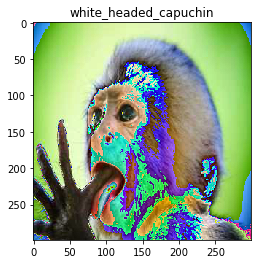

In [173]:
kenken = {'0':'mantled_howler', '1':'patas_monkey', '2':'bald_uakari',
          '3':'japanese_macaque', '4':'pygmy_marmoset', '5':'white_headed_capuchin', '6':'silvery_marmoset', 
          '7':'common_squirrel_monkey', '8':'black_headed_night_monkey', '9':'nilgiri_langur'}
plt.imshow(x_val[0])
plt.title(kenken[str(enen[0])])
plt.show()

In [171]:
enen = []
for i in a:
   enen.append(np.argmax(i))

In [172]:
enen

[5, 0, 5, 7, 3, 9, 3, 3, 3, 2]

In [174]:
with tf.Session() as sess:
    #init.run()
    saver.restore(sess, "./my_monkey_model")
    b = sess.run(new_logits, feed_dict={X: x_val[:100], y: y_val[:100]})

INFO:tensorflow:Restoring parameters from ./my_monkey_model


In [175]:
enen1 = []
for i in b:
   enen1.append(np.argmax(i))

In [176]:
enen1

[5,
 0,
 5,
 7,
 3,
 9,
 3,
 3,
 3,
 2,
 5,
 7,
 3,
 1,
 7,
 6,
 3,
 4,
 2,
 5,
 2,
 5,
 3,
 3,
 2,
 7,
 0,
 6,
 7,
 3,
 7,
 0,
 9,
 3,
 3,
 4,
 5,
 2,
 9,
 1,
 9,
 7,
 2,
 6,
 0,
 9,
 0,
 3,
 0,
 0,
 3,
 4,
 6,
 0,
 5,
 0,
 5,
 5,
 6,
 1,
 6,
 9,
 5,
 4,
 5,
 5,
 5,
 7,
 7,
 4,
 7,
 1,
 2,
 0,
 0,
 5,
 8,
 9,
 6,
 9,
 8,
 4,
 0,
 5,
 7,
 7,
 1,
 8,
 7,
 1,
 8,
 5,
 1,
 0,
 4,
 7,
 5,
 5,
 8,
 1]

In [184]:
from sklearn.metrics import confusion_matrix as cm
kaka = np.array(enen1)
feifei = y_val[:100].astype(int)
confusion_table = cm(feifei, kaka)

In [185]:
confusion_table

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  1,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  5,  5,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6]])